In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix

# Relative path to the dataset
file_path_parkinson = "datasetviejo/parkinsons_disease_data.csv"
# Load the dataset
data_Parkinson = pd.read_csv(file_path_parkinson)
data_Parkinson.drop(columns=['DoctorInCharge', 'EducationLevel', 'PatientID'], inplace=True)

In [3]:
#########################################################################################################
# COLUMNS DATASET
#########################################################################################################

In [5]:
print(data_Parkinson.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   BMI                       2105 non-null   float64
 4   Smoking                   2105 non-null   int64  
 5   AlcoholConsumption        2105 non-null   float64
 6   PhysicalActivity          2105 non-null   float64
 7   DietQuality               2105 non-null   float64
 8   SleepQuality              2105 non-null   float64
 9   FamilyHistoryParkinsons   2105 non-null   int64  
 10  TraumaticBrainInjury      2105 non-null   int64  
 11  Hypertension              2105 non-null   int64  
 12  Diabetes                  2105 non-null   int64  
 13  Depression                2105 non-null   int64  
 14  Stroke  

In [7]:
#########################################################################################################
# TABLA DATASET
#########################################################################################################

In [9]:
# Ajustar el tamaño de las columnas para que se vean de manera más clara
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', 1000)  # Ajusta el ancho de la tabla
pd.set_option('display.max_rows', 100)  # Muestra un número mayor de filas si es necesario

data_Parkinson # Muestra las primeras 5 filas de manera legible

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,87,1,0,38.483841,0,12.674393,5.325900,5.947278,6.296231,0,0,1,0,0,0,92,98,191.372707,98.730980,93.269555,161.291730,187.887925,28.634010,8.076254,1,0,0,0,1,1,0,0
2101,67,0,0,33.694396,1,0.977018,0.108599,4.825187,6.342325,1,0,0,0,0,0,103,96,150.188647,112.063230,47.524626,240.086616,172.325253,13.106537,1.665751,0,0,0,1,0,1,1,1
2102,65,0,0,22.829631,0,6.152286,5.775103,0.334244,9.740019,1,0,0,1,0,1,168,79,159.351155,61.543591,72.765698,222.231014,111.851581,26.527734,4.785614,0,0,0,0,1,1,0,1
2103,61,1,0,16.871030,1,0.292094,2.280475,9.598513,8.289390,0,0,0,0,0,0,129,97,232.240473,53.029891,99.945560,167.980928,144.474453,19.873404,8.378979,1,0,1,0,0,1,1,1


In [11]:
#########################################################################################################
# GRAFICOS DATASET
#########################################################################################################

In [ ]:
# Define the number of columns for pie charts
pie_chart_columns = 3  # Adjust this to control how many pie charts per row

# Initialize a counter for the subplot positions
plot_counter = 1

# Generate appropriate charts for each column
for column in data_Parkinson.columns:
    unique_values = data_Parkinson[column].unique()
    
    # For categorical columns or columns with few unique values, use pie chart
    if data_Parkinson[column].dtype == 'object' or len(unique_values) < 20:
        value_counts = data_Parkinson[column].value_counts()
        
        # Calculate the subplot grid size
        if plot_counter % pie_chart_columns == 1:  # New row for the next pie chart
            plt.figure(figsize=(12, 4))  # Adjust figure size as needed
            
        # Create the pie chart
        plt.subplot(1, pie_chart_columns, plot_counter % pie_chart_columns + 1)
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.title(f'Distribution of {column}', fontsize=10)
        plt.axis('equal')  # Ensure the pie chart is a circle
        
        # Update plot counter
        plot_counter += 1

        if plot_counter % pie_chart_columns == 1:  # Start a new row after max number of pie charts per row
            plt.tight_layout()
            plt.show()
        
    # For numerical columns with many unique values, use histogram and boxplot
    elif data_Parkinson[column].dtype == 'float64' or data_Parkinson[column].dtype == 'int64':
        plt.figure(figsize=(10, 4))  # Smaller combined figure
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data_Parkinson[column], kde=True, bins=20, color='blue', alpha=0.7)
        plt.title(f'Histogram of {column}', fontsize=10)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data_Parkinson[column], color='orange')
        plt.title(f'Boxplot of {column}', fontsize=10)
        plt.xlabel(column, fontsize=10)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping column '{column}' due to unsupported data type.")


In [13]:
#########################################################################################################
# DISTRIBUCION DE LABELS ORIGINALES
#########################################################################################################

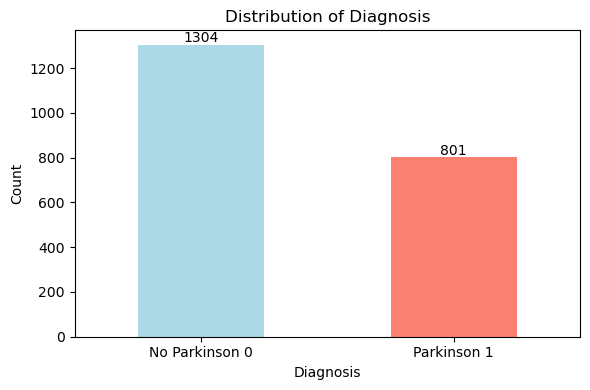

In [15]:
# Contar y mostrar con nombres explícitos
diagnosis_counts = data_Parkinson['Diagnosis'].value_counts().rename({0: 'No Parkinson 0', 1: 'Parkinson 1'})

# Crear gráfico de barras y añadir números encima
ax = diagnosis_counts.plot(kind='bar', color=['lightblue', 'salmon'], figsize=(6, 4))
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Ajustes y mostrar
ax.set(title='Distribution of Diagnosis', xlabel='Diagnosis', ylabel='Count', xticks=range(2), xticklabels=['No Parkinson 0', 'Parkinson 1'])
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()


In [17]:
#########################################################################################################
# PREPARACION DOS DADOS
# 1- OVER SAMPLING WITH SMOTE
#########################################################################################################

In [19]:
#APLICAR OVER SAMPLING CON SMOTE
# 1. **Separar las variables predictoras y la etiqueta (Diagnosis)**
X = data_Parkinson.drop(columns=['Diagnosis'])  # Variables predictoras
y = data_Parkinson['Diagnosis']                # Etiqueta (0 o 1)

# 2. **Aplicar SMOTE para balancear la clase minoritaria**
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_over_sampling, y_over_sampling = smote.fit_resample(X, y)

# 3. **Crear un DataFrame con los datos resampleados**
data_over_sampling = pd.concat([pd.DataFrame(X_over_sampling), pd.DataFrame(y_over_sampling, columns=['Diagnosis'])], axis=1)

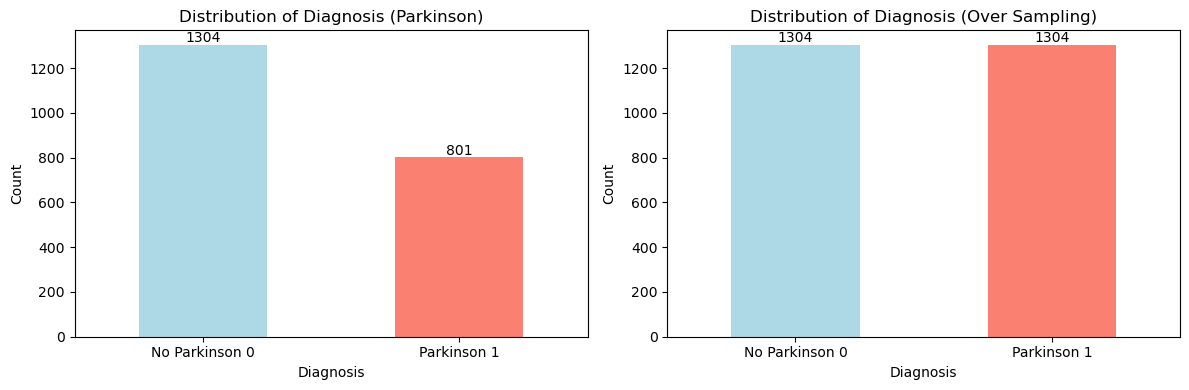

In [21]:
# Contar y mostrar con nombres explícitos
diagnosis_counts_1 = data_Parkinson['Diagnosis'].value_counts().rename({0: 'No Parkinson 0', 1: 'Parkinson 1'})
diagnosis_counts_2 = data_over_sampling['Diagnosis'].value_counts().rename({0: 'No Parkinson 0', 1: 'Parkinson 1'})

# Crear los subgráficos en una fila con 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Primer gráfico
diagnosis_counts_1.plot(kind='bar', color=['lightblue', 'salmon'], ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
ax1.set(title='Distribution of Diagnosis (Parkinson)', xlabel='Diagnosis', ylabel='Count', xticks=range(2), xticklabels=['No Parkinson 0', 'Parkinson 1'])
ax1.tick_params(axis='x', rotation=0)  # Asegura que las etiquetas estén horizontales

# Segundo gráfico
diagnosis_counts_2.plot(kind='bar', color=['lightblue', 'salmon'], ax=ax2)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
ax2.set(title='Distribution of Diagnosis (Over Sampling)', xlabel='Diagnosis', ylabel='Count', xticks=range(2), xticklabels=['No Parkinson 0', 'Parkinson 1'])
ax2.tick_params(axis='x', rotation=0)  # Asegura que las etiquetas estén horizontales

# Ajustar y mostrar
plt.tight_layout()
plt.show()


In [23]:
#########################################################################################################
# PREPARACION DOS DADOS
# 2 - UNDER SAMPLING MANUAL WITH RESAMPLE 
#########################################################################################################

In [25]:
# 4. **Separar clases (mayoritaria y minoritaria original)**
data_majority = data_Parkinson[data_Parkinson['Diagnosis'] == 1]  # Clase mayoritaria original (1304)
data_minority_original = data_Parkinson[data_Parkinson['Diagnosis'] == 0]  # Clase minoritaria original (801)

# 5. **Separar la clase minoritaria generada**
data_minority_generated = data_over_sampling[data_over_sampling['Diagnosis'] == 0].iloc[len(data_minority_original):].reset_index(drop=True) # Clase minoritaria generada por smote

# 6. **Reducir la clase mayoritaria a 1200 muestras**
majority_under_sampling = resample(
    data_majority,
    replace=False,   # Sin reemplazo
    n_samples=int(len(data_majority) - len(data_minority_generated) * 0.3),  # Reducir al 80% del tamaño original
    random_state=42  # Reproducibilidad
)

# 7. **Reducir la clase minoritaria generada a 399 muestras**
minority_generated_under_sampling = resample(
    data_minority_generated,
    replace=False,   # Sin reemplazo
    n_samples=int(len(data_minority_generated) - len(data_minority_generated) * 0.3),  # Reducir al 80% del tamaño original
    random_state=42  # Reproducibilidad
)

# 8. **Combinar los datos originales de la clase minoritaria con los generados**
minority_under_sampling = pd.concat([data_minority_original, minority_generated_under_sampling])

# 9. **Combinar las clases balanceadas en un DataFrame final**
data_under_sampling = pd.concat([minority_under_sampling, majority_under_sampling])

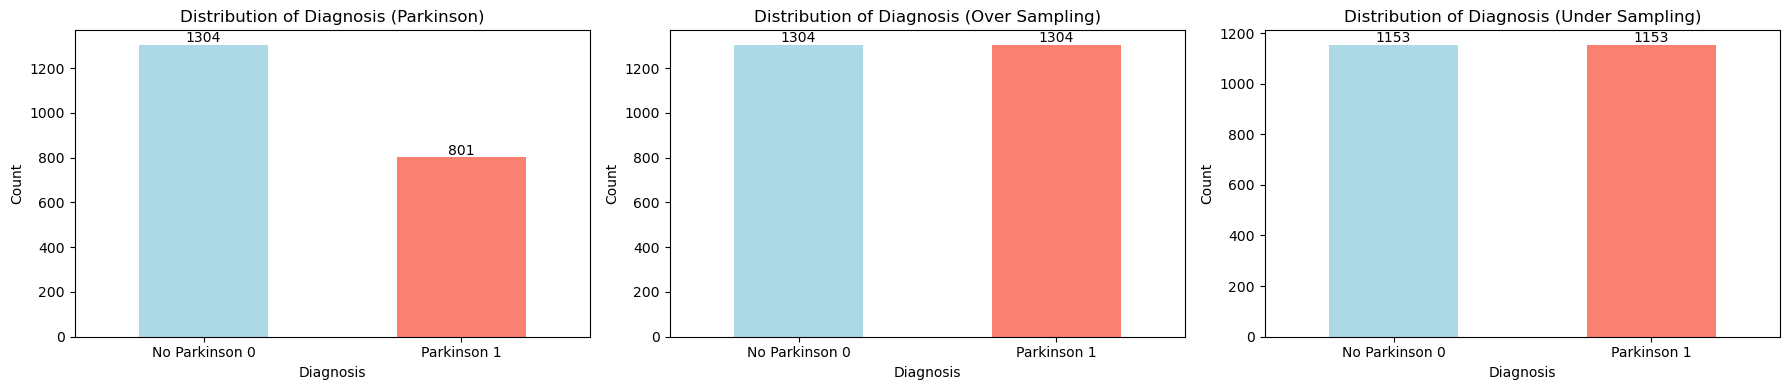

In [29]:
# Contar y mostrar con nombres explícitos para los tres conjuntos de datos
diagnosis_counts_1 = data_Parkinson['Diagnosis'].value_counts().rename({0: 'No Parkinson 0', 1: 'Parkinson 1'})
diagnosis_counts_2 = data_over_sampling['Diagnosis'].value_counts().rename({0: 'No Parkinson 0', 1: 'Parkinson 1'})
diagnosis_counts_3 = data_under_sampling['Diagnosis'].value_counts().rename({0: 'No Parkinson 0', 1: 'Parkinson 1'})

# Crear los subgráficos en una fila con 3 columnas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

# Primer gráfico
diagnosis_counts_1.plot(kind='bar', color=['lightblue', 'salmon'], ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
ax1.set(title='Distribution of Diagnosis (Parkinson)', xlabel='Diagnosis', ylabel='Count', xticks=range(2), xticklabels=['No Parkinson 0', 'Parkinson 1'])
ax1.tick_params(axis='x', rotation=0)

# Segundo gráfico
diagnosis_counts_2.plot(kind='bar', color=['lightblue', 'salmon'], ax=ax2)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
ax2.set(title='Distribution of Diagnosis (Over Sampling)', xlabel='Diagnosis', ylabel='Count', xticks=range(2), xticklabels=['No Parkinson 0', 'Parkinson 1'])
ax2.tick_params(axis='x', rotation=0)

# Tercer gráfico
diagnosis_counts_3.plot(kind='bar', color=['lightblue', 'salmon'], ax=ax3)
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
ax3.set(title='Distribution of Diagnosis (Under Sampling)', xlabel='Diagnosis', ylabel='Count', xticks=range(2), xticklabels=['No Parkinson 0', 'Parkinson 1'])
ax3.tick_params(axis='x', rotation=0)

# Ajustar y mostrar
plt.tight_layout()
plt.show()


In [31]:
#########################################################################################################
# PREPARACION DOS DADOS
# GRAFICOS DE DISPERCION 
#########################################################################################################

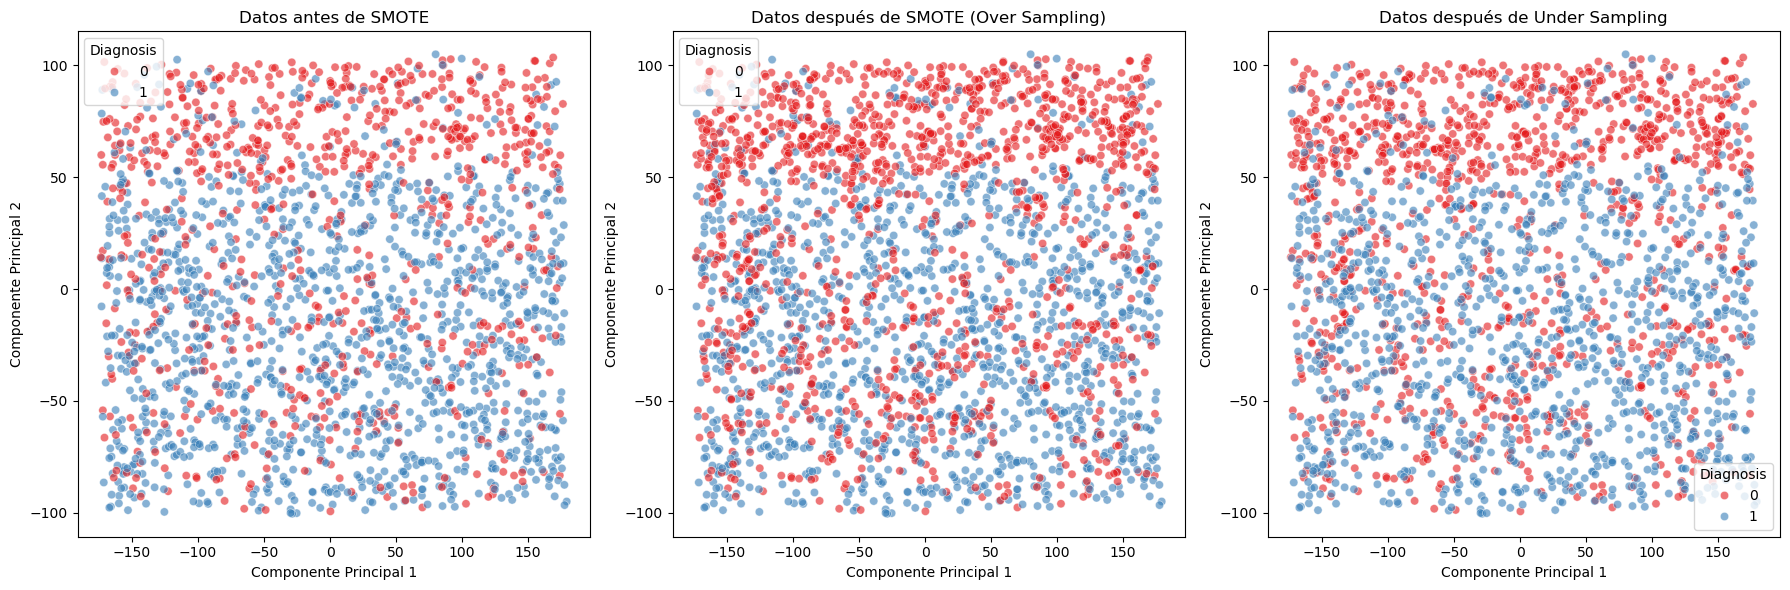

In [33]:
# Separar las variables predictoras y etiquetas
X_Alzheimer = data_Parkinson.drop(columns=['Diagnosis'])
y_Alzheimer = data_Parkinson['Diagnosis']

# Transformar los datos después de SMOTE (over-sampling)
X_over_sampling = data_over_sampling.drop(columns=['Diagnosis'])
y_over_sampling = data_over_sampling['Diagnosis']

# Separar las variables predictoras y etiquetas de los datos después de under-sampling
X_under_sampling = data_under_sampling.drop(columns=['Diagnosis'])
y_under_sampling = data_under_sampling['Diagnosis']

# Crear una instancia de PCA y ajustarla a los datos originales
pca = PCA(n_components=2)
pca.fit(X_Alzheimer)

# Transformar los datos usando el mismo modelo de PCA
X_Alzheimer_pca = pca.transform(X_Alzheimer)
X_over_sampling_pca = pca.transform(X_over_sampling)
X_under_sampling_pca = pca.transform(X_under_sampling)

# Graficar antes, después de SMOTE y después de under-sampling
plt.figure(figsize=(18, 6))

# Subplot para los datos antes de SMOTE
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_Alzheimer_pca[:, 0], y=X_Alzheimer_pca[:, 1], hue=y_Alzheimer, palette='Set1', alpha=0.6)
plt.title('Datos antes de SMOTE')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Subplot para los datos después de SMOTE (over-sampling)
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_over_sampling_pca[:, 0], y=X_over_sampling_pca[:, 1], hue=y_over_sampling, palette='Set1', alpha=0.6)
plt.title('Datos después de SMOTE (Over Sampling)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Subplot para los datos después de under-sampling
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_under_sampling_pca[:, 0], y=X_under_sampling_pca[:, 1], hue=y_under_sampling, palette='Set1', alpha=0.6)
plt.title('Datos después de Under Sampling')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()

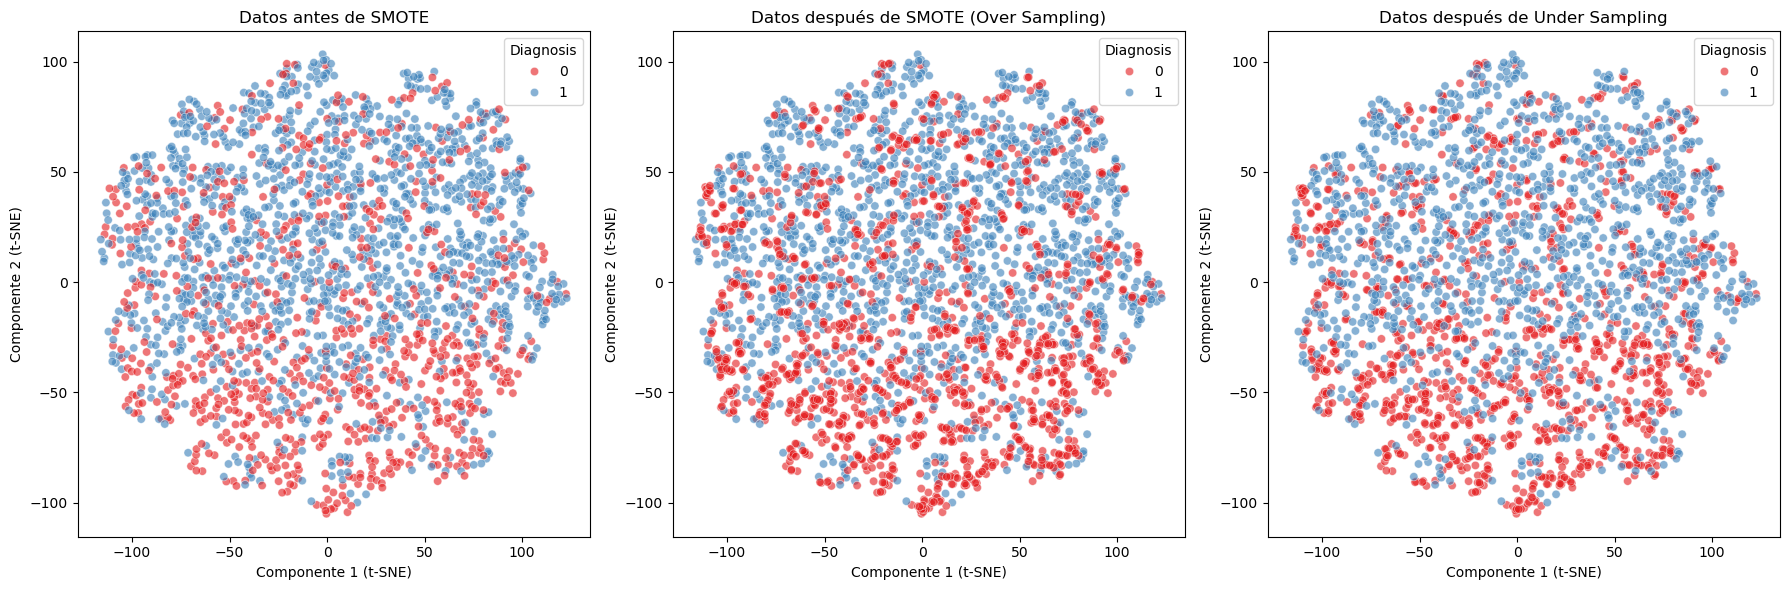

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las variables predictoras y etiquetas
X_Alzheimer = data_Parkinson.drop(columns=['Diagnosis'])
y_Alzheimer = data_Parkinson['Diagnosis']

# Transformar los datos después de SMOTE (over-sampling)
X_over_sampling = data_over_sampling.drop(columns=['Diagnosis'])
y_over_sampling = data_over_sampling['Diagnosis']

# Separar las variables predictoras y etiquetas de los datos después de under-sampling
X_under_sampling = data_under_sampling.drop(columns=['Diagnosis'])
y_under_sampling = data_under_sampling['Diagnosis']

# Concatenar todos los datos para aplicar t-SNE
X_all = pd.concat([X_Alzheimer, X_over_sampling, X_under_sampling], axis=0)
y_all = pd.concat([y_Alzheimer, y_over_sampling, y_under_sampling], axis=0)

# Crear una instancia de t-SNE y ajustarla a los datos concatenados
tsne = TSNE(n_components=2, random_state=42)

# Aplicar t-SNE a todos los datos a la vez
X_all_tsne = tsne.fit_transform(X_all)

# Dividir de nuevo los datos transformados en las tres partes
X_Alzheimer_tsne = X_all_tsne[:len(X_Alzheimer), :]
X_over_sampling_tsne = X_all_tsne[len(X_Alzheimer):len(X_Alzheimer) + len(X_over_sampling), :]
X_under_sampling_tsne = X_all_tsne[len(X_Alzheimer) + len(X_over_sampling):, :]

# Graficar antes, después de SMOTE y después de under-sampling
plt.figure(figsize=(18, 6))

# Subplot para los datos antes de SMOTE
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_Alzheimer_tsne[:, 0], y=X_Alzheimer_tsne[:, 1], hue=y_Alzheimer, palette='Set1', alpha=0.6)
plt.title('Datos antes de SMOTE')
plt.xlabel('Componente 1 (t-SNE)')
plt.ylabel('Componente 2 (t-SNE)')

# Subplot para los datos después de SMOTE (over-sampling)
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_over_sampling_tsne[:, 0], y=X_over_sampling_tsne[:, 1], hue=y_over_sampling, palette='Set1', alpha=0.6)
plt.title('Datos después de SMOTE (Over Sampling)')
plt.xlabel('Componente 1 (t-SNE)')
plt.ylabel('Componente 2 (t-SNE)')

# Subplot para los datos después de under-sampling
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_under_sampling_tsne[:, 0], y=X_under_sampling_tsne[:, 1], hue=y_under_sampling, palette='Set1', alpha=0.6)
plt.title('Datos después de Under Sampling')
plt.xlabel('Componente 1 (t-SNE)')
plt.ylabel('Componente 2 (t-SNE)')

plt.tight_layout()
plt.show()

In [39]:
#########################################################################################################
# ENTRENAMIENTO DEL MODELO (RandomForestClassifier)
# 1- CREAR LOS CONJUNTOS DE DATOS TRAIN Y TEST / ORIGINAL , OVER Y UNDER SAMPLING
#########################################################################################################

In [41]:
from sklearn.model_selection import train_test_split

# Para los datos de Parkinson (sin modificar)
X_parkinson = data_Parkinson.drop(columns=['Diagnosis'])
y_parkinson = data_Parkinson['Diagnosis']

X_train_parkinson, X_test_parkinson, y_train_parkinson, y_test_parkinson = train_test_split(
    X_parkinson,
    y_parkinson,
    test_size=0.2,
    random_state=42,
    shuffle=True  # Asegura que los datos se mezclen
)

# Para los datos de over-sampling
X_over_sampling = data_over_sampling.drop(columns=['Diagnosis'])
y_over_sampling = data_over_sampling['Diagnosis']

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over_sampling,
    y_over_sampling,
    test_size=0.2,
    random_state=42,
    shuffle=True  # Asegura que los datos se mezclen
)

# Para los datos de under-sampling
X_under_sampling = data_under_sampling.drop(columns=['Diagnosis'])
y_under_sampling = data_under_sampling['Diagnosis']

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under_sampling,
    y_under_sampling,
    test_size=0.2,
    random_state=42,
    shuffle=True  # Asegura que los datos se mezclen
)

In [43]:
# Ejemplo de cómo revisar los primeros registros de cada conjunto de entrenamiento
print(f"Registros en X_train_parkinson: {X_train_parkinson.shape[0]}")
X_train_parkinson.head(5)

Registros en X_train_parkinson: 1684


,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
874,71,1,0,19.155099,0,1.919463,4.764986,5.300694,9.128088,0,0,0,0,0,0,105,82,268.906784,58.102029,23.165202,112.286724,60.943375,26.443053,6.513650,1,0,0,0,0,0,0
650,59,1,1,38.249839,0,2.418690,6.748132,2.660659,9.181415,0,0,0,0,0,0,108,73,269.628465,100.249241,43.209394,73.248925,35.656511,19.790004,2.454925,0,1,0,0,1,0,0
1596,54,1,0,38.030741,0,6.969826,2.745969,0.338839,7.926952,0,0,0,0,0,0,163,94,299.289261,73.859480,21.618062,115.640540,102.173289,7.601740,5.874319,1,1,0,0,0,0,0
1578,71,1,0,34.695773,0,15.977019,8.877672,9.703288,6.366299,1,1,0,1,1,0,119,94,212.803350,162.019189,23.345351,356.648414,105.770049,14.387380,2.506560,1,0,0,0,1,0,0
1560,70,0,0,35.811746,0,6.084242,8.094054,4.633972,5.647728,0,0,0,0,0,0,90,84,219.972033,189.671900,61.425889,73.722287,183.510691,2.772640,6.745840,0,0,0,0,1,1,0


In [45]:
print(f"Registros en X_train_over: {X_train_over.shape[0]}")
X_train_over.head(5)

Registros en X_train_over: 2086


,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
49,58,1,0,17.522179,0,11.619704,6.972037,1.558950,4.424762,0,0,0,0,1,0,111,76,272.554054,115.368811,61.949088,177.355307,138.543192,15.287332,2.116127,1,1,0,0,0,0,1
582,88,1,0,16.959155,0,9.164974,9.969433,6.651035,6.195415,0,0,0,0,0,0,130,96,214.586119,198.104483,84.279448,323.553712,178.021114,28.307647,7.823221,0,0,0,0,0,0,1
2371,85,1,1,34.639676,0,6.756334,7.393605,6.353292,6.539521,0,0,0,0,0,0,136,79,234.789889,59.011609,71.485889,102.120635,30.274925,11.580785,5.368077,0,0,0,0,0,0,0
48,71,1,3,18.806417,1,16.419333,9.541253,3.093043,4.230082,0,0,0,0,0,0,169,74,229.968494,97.059048,42.901221,194.881361,114.260748,9.769857,2.371874,1,0,0,1,0,0,0
1674,77,0,0,23.597022,1,8.253156,8.885142,8.751655,4.253672,0,0,0,0,0,0,167,68,184.525177,141.074064,50.443816,206.712938,13.100156,2.746709,5.604844,1,0,0,0,0,0,0


In [47]:
print(f"Registros en X_train_under: {X_train_under.shape[0]}")
X_train_under.head(5)

Registros en X_train_under: 1844


,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
1730,86,1,0,20.647791,0,15.188040,3.013362,5.626619,6.750705,0,0,0,0,0,0,139,110,163.493933,69.466965,45.778721,361.618282,25.408085,2.270937,8.679462,1,0,0,0,0,1,0
95,68,0,1,37.071084,1,2.918299,3.448941,3.268292,9.124997,1,0,0,0,0,0,155,87,189.306156,183.961558,78.163727,139.265157,179.677077,8.587266,5.216909,1,0,0,0,0,1,1
442,57,0,0,26.648092,0,13.482874,3.047508,4.744016,9.085189,0,0,0,0,0,0,145,79,275.573238,86.819420,60.363639,67.436122,115.590702,26.294069,7.086833,0,0,0,0,0,0,0
1016,50,1,0,16.836197,0,12.063646,4.527356,1.745988,9.982379,0,0,0,0,0,0,163,88,164.643671,171.888283,70.621446,144.267012,113.263038,20.067335,9.582002,0,0,0,0,0,0,0
175,75,0,0,20.876111,0,3.649863,6.535219,2.617343,6.669084,0,0,0,0,0,0,99,87,227.284280,69.118223,24.660678,102.232172,63.411917,27.569546,8.163736,0,0,0,0,0,0,0


In [49]:
#########################################################################################################
# ENTRENAMIENTO DEL MODELO (RandomForestClassifier)
# 2- IMPLEMENTAR EL MODELO () / ORIGINAL , OVER Y UNDER SAMPLING
#########################################################################################################

In [51]:
# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)

# Inicializar StratifiedKFold para validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [53]:
# **Para los datos originales**
print("\nEvaluating Model on Original Data:")

# Validación cruzada
cv_scores_parkinson = cross_val_score(rf_model, X_train_parkinson, y_train_parkinson, cv=skf, scoring='accuracy')
print(f"Accuracy (cross-validation scores): {cv_scores_parkinson}")
print(f"Mean Accuracy (cross-validation): {cv_scores_parkinson.mean():.4f} \n")

# Ahora entrenamos el modelo con todo el conjunto de entrenamiento
rf_model.fit(X_train_parkinson, y_train_parkinson)

# Hacer predicciones sobre el conjunto de prueba
y_pred_parkinson = rf_model.predict(X_test_parkinson)

# Imprimir el informe de clasificación sobre los datos de prueba
print("Informe de clasificación en los datos de prueba:")
print(classification_report(y_test_parkinson, y_pred_parkinson))

# Evaluación de las predicciones en el conjunto de prueba
test_accuracy_parkinson = accuracy_score(y_test_parkinson, y_pred_parkinson)
print(f"Test Accuracy: {test_accuracy_parkinson:.4f} \n")

# Matriz de confusión en el conjunto de prueba
cm_parkinson = confusion_matrix(y_test_parkinson, y_pred_parkinson)
print(f"Confusion Matrix:\n{cm_parkinson}")


Evaluating Model on Original Data:
Accuracy (cross-validation scores): [0.91097923 0.90801187 0.93175074 0.91988131 0.94345238]
Mean Accuracy (cross-validation): 0.9228 

Informe de clasificación en los datos de prueba:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       150
           1       0.94      0.92      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.91      0.91       421
weighted avg       0.91      0.91      0.91       421

Test Accuracy: 0.9121 

Confusion Matrix:
[[135  15]
 [ 22 249]]


AUC: 0.9533


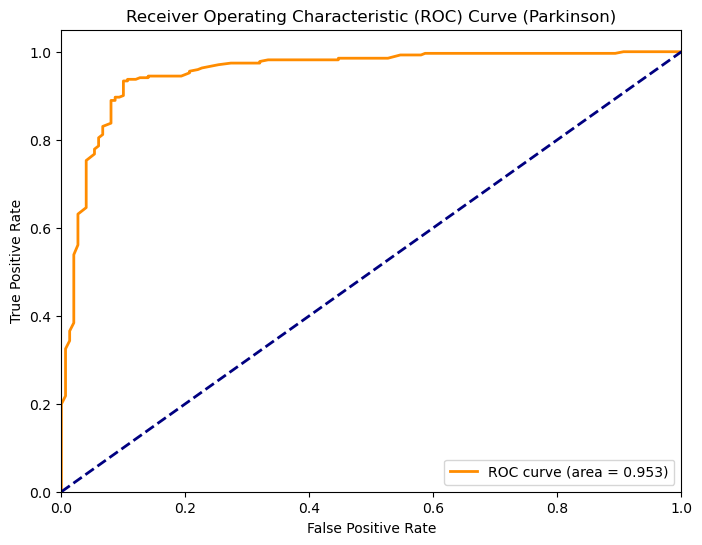

In [54]:
# Obtener las probabilidades de predicción para la clase positiva (1)
y_prob_parkinson_original = rf_model.predict_proba(X_test_parkinson)[:, 1]  # Probabilidades para la clase 1

# Calcular la curva ROC
fpr_parkinson_original, tpr_parkinson_original, _ = roc_curve(y_test_parkinson, y_prob_parkinson_original)
roc_auc_parkinson_original = auc(fpr_parkinson_original, tpr_parkinson_original)
print(f"AUC: {roc_auc_parkinson_original:.4f}")

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_parkinson_original, tpr_parkinson_original, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_parkinson_original:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (sin discriminación)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Parkinson)')
plt.legend(loc="lower right")
plt.show()

In [57]:
# **Para los datos de over-sampling**
print("\nEvaluating Model on Over-Sampling Data:")

# Validación cruzada
cv_scores_over = cross_val_score(rf_model, X_train_over, y_train_over, cv=skf, scoring='accuracy')
print(f"Accuracy pr epoc: {cv_scores_over}")
print(f"Mean Accuracy: {cv_scores_over.mean():.4f} \n")

# Ahora entrenamos el modelo con todo el conjunto de entrenamiento
rf_model.fit(X_train_over, y_train_over)

# Hacer predicciones sobre el conjunto de prueba
y_pred_over = rf_model.predict(X_test_over)

# Imprimir el informe de clasificación sobre los datos de prueba
print("Informe de clasificación en los datos de prueba:")
print(classification_report(y_test_over, y_pred_over))

# Evaluación de las predicciones en el conjunto de prueba
test_accuracy_over = accuracy_score(y_test_over, y_pred_over)
print(f"Test Accuracy: {test_accuracy_over:.4f} \n")

# Matriz de confusión en el conjunto de prueba
cm_over = confusion_matrix(y_test_over, y_pred_over)
print(f"Confusion Matrix:\n{cm_over}")


Evaluating Model on Over-Sampling Data:
Accuracy pr epoc: [0.92822967 0.9352518  0.91366906 0.90647482 0.92326139]
Mean Accuracy: 0.9214 

Informe de clasificación en los datos de prueba:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       252
           1       0.91      0.93      0.92       270

    accuracy                           0.92       522
   macro avg       0.92      0.92      0.92       522
weighted avg       0.92      0.92      0.92       522

Test Accuracy: 0.9195 

Confusion Matrix:
[[228  24]
 [ 18 252]]


AUC: 0.9664


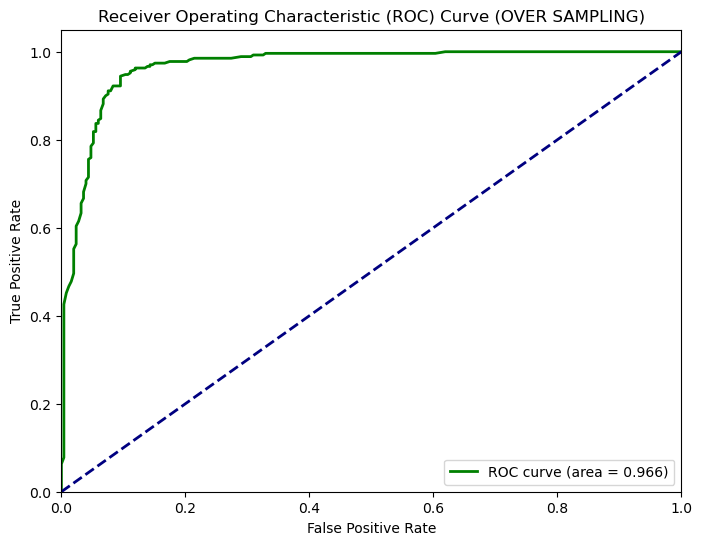

In [58]:
# Obtener las probabilidades de predicción para la clase positiva (1)
y_prob_parkinson_over = rf_model.predict_proba(X_test_over)[:, 1]  # Probabilidades para la clase 1

# Calcular la curva ROC
fpr_parkinson_over, tpr_parkinson_over, _ = roc_curve(y_test_over, y_prob_parkinson_over)
roc_auc_parkinson_over = auc(fpr_parkinson_over, tpr_parkinson_over)
print(f"AUC: {roc_auc_parkinson_over:.4f}")

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_parkinson_over, tpr_parkinson_over, color='green', lw=2, label=f'ROC curve (area = {roc_auc_parkinson_over:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (sin discriminación)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (OVER SAMPLING)')
plt.legend(loc="lower right")
plt.show()

In [61]:
# **Para los datos de under-sampling**
print("\nEvaluating Model on Under-Sampling Data:")

# Validación cruzada
cv_scores_under = cross_val_score(rf_model, X_train_under, y_train_under, cv=skf, scoring='accuracy')
print(f"Accuracy pr epoc: {cv_scores_over}")
print(f"Mean Accuracy: {cv_scores_under.mean():.4f} \n")

# Ahora entrenamos el modelo con todo el conjunto de entrenamiento
rf_model.fit(X_train_under, y_train_under)

# Hacer predicciones sobre el conjunto de prueba
y_pred_under = rf_model.predict(X_test_under)

# Imprimir el informe de clasificación sobre los datos de prueba
print("Informe de clasificación en los datos de prueba:")
print(classification_report(y_test_under, y_pred_under))

# Evaluación de las predicciones en el conjunto de prueba
test_accurac_under = accuracy_score(y_test_under, y_pred_under)
print(f"Test Accuracy: {test_accurac_under:.4f} \n")

# Matriz de confusión en el conjunto de prueba
cm_under = confusion_matrix(y_test_under, y_pred_under)
print(f"Confusion Matrix:\n{cm_under}")


Evaluating Model on Under-Sampling Data:
Accuracy pr epoc: [0.92822967 0.9352518  0.91366906 0.90647482 0.92326139]
Mean Accuracy: 0.9197 

Informe de clasificación en los datos de prueba:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       228
           1       0.92      0.92      0.92       234

    accuracy                           0.92       462
   macro avg       0.92      0.92      0.92       462
weighted avg       0.92      0.92      0.92       462

Test Accuracy: 0.9199 

Confusion Matrix:
[[209  19]
 [ 18 216]]


AUC: 0.9638


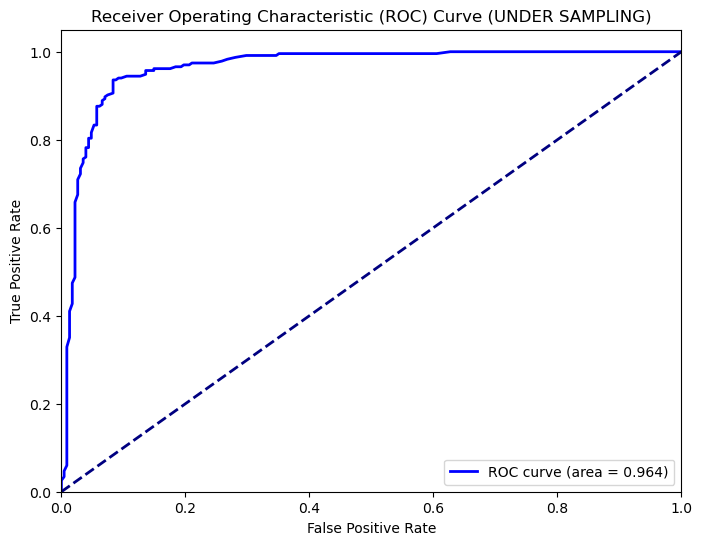

In [62]:
# Obtener las probabilidades de predicción para la clase positiva (1)
y_prob_parkinson_under = rf_model.predict_proba(X_test_under)[:, 1]  # Probabilidades para la clase 1

# Calcular la curva ROC
fpr_parkinson_under, tpr_parkinson_under, _ = roc_curve(y_test_under, y_prob_parkinson_under)
roc_auc_parkinson_under = auc(fpr_parkinson_under, tpr_parkinson_under)
print(f"AUC: {roc_auc_parkinson_under:.4f}")

# Trazar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_parkinson_under, tpr_parkinson_under, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_parkinson_under:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (sin discriminación)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (UNDER SAMPLING)')
plt.legend(loc="lower right")
plt.show()

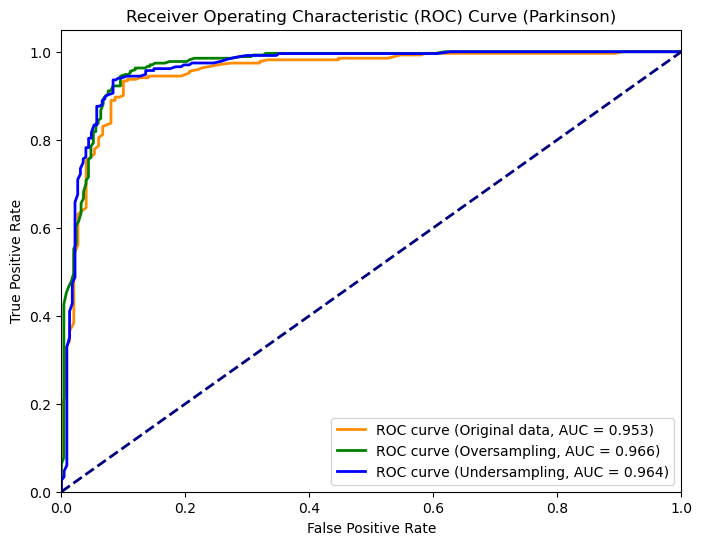

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Trazar todas las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))

# Curva ROC para el conjunto de datos original
plt.plot(fpr_parkinson_original, tpr_parkinson_original, color='darkorange', lw=2,
         label=f'ROC curve (Original data, AUC = {roc_auc_parkinson_original:.3f})')

# Curva ROC para el conjunto de datos con sobremuestreo
plt.plot(fpr_parkinson_over, tpr_parkinson_over, color='green', lw=2,
         label=f'ROC curve (Oversampling, AUC = {roc_auc_parkinson_over:.3f})')

# Curva ROC para el conjunto de datos con submuestreo
plt.plot(fpr_parkinson_under, tpr_parkinson_under, color='blue', lw=2,
         label=f'ROC curve (Undersampling, AUC = {roc_auc_parkinson_under:.3f})')

# Línea diagonal (sin discriminación)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Ajustar los límites y etiquetas
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Parkinson)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.utils import resample

# Making copies of majority and minority classes to avoid modifying original data
data_majority = data_Alzheimer[data_Alzheimer['Diagnosis'] == 1].copy()
data_minority = data_Alzheimer[data_Alzheimer['Diagnosis'] == 0].copy()

# Oversample minority class
data_minority_oversampled = resample(data_minority,
                                     replace=True,  # sample with replacement
                                     n_samples=len(data_majority),  # to match the majority class size
                                     random_state=42)  # for reproducibility

# Combine majority class with oversampled minority class
data_oversampled = pd.concat([data_majority, data_minority_oversampled])

# Determine the number of samples to keep from each part
n_samples_to_keep = 1100

# Ensure not to delete any original data by making copies for reduction
majority_for_reduction = data_majority.copy()
minority_for_reduction = data_minority_oversampled.copy()

# Randomly sample from majority and oversampled minority classes
reduced_majority_sample = resample(majority_for_reduction,
                                   replace=False,  # sample without replacement
                                   n_samples=n_samples_to_keep,  # number of samples to keep
                                   random_state=42)  # for reproducibility

reduced_minority_sample = resample(minority_for_reduction,
                                   replace=False,  # sample without replacement
                                   n_samples=n_samples_to_keep,  # number of samples to keep
                                   random_state=42)  # for reproducibility

# Combine the reduced samples to create a balanced dataset
data_balanced = pd.concat([reduced_majority_sample, reduced_minority_sample])

# Display new class counts
print("Alzheimer Diagnosis Distribution after balancing:\n", data_balanced['Diagnosis'].value_counts())

In [67]:
data_under_sampling

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0
4,87,0,0,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0
5,68,1,2,39.423311,1,13.596889,7.796704,7.070239,7.737549,0,0,0,0,0,0,151,90,290.133122,91.750218,54.488919,253.797334,101.912536,27.370580,6.824779,0,0,0,0,0,0,0,0
6,78,1,0,30.542003,1,2.011281,9.028536,9.838446,5.981984,0,0,1,0,0,0,122,60,283.503014,145.801410,64.045674,319.854815,37.453720,17.432685,0.502747,1,0,0,0,1,0,0,0
9,71,0,3,23.727086,1,17.782910,7.344890,3.393018,9.245380,0,1,0,0,1,0,169,105,204.471842,103.326806,35.001964,208.051954,115.965869,26.226672,5.346982,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,86,1,0,36.815811,0,11.720427,9.345714,8.584298,9.901112,1,0,0,0,0,0,98,91,280.920320,129.038796,68.141108,277.494394,51.604027,22.432022,6.408312,1,0,0,0,0,1,0,1
1810,50,1,0,29.660517,1,2.683234,7.609802,0.154462,7.336679,0,0,1,1,0,0,151,64,237.971887,91.437391,56.767222,111.800266,175.199917,0.090514,3.937711,0,0,0,0,1,1,0,1
1026,53,0,1,21.373318,0,9.876284,4.131864,1.866019,6.743948,1,0,0,1,0,0,147,99,288.790616,195.863847,46.921369,311.699109,100.919480,0.930149,1.699814,0,1,0,1,0,1,0,1
1921,64,0,0,38.004874,0,17.206367,7.837438,3.630178,7.649684,0,0,0,0,0,0,125,94,245.688046,102.009636,22.665697,94.346845,114.260520,12.990005,9.394232,1,0,0,1,0,0,0,1


In [77]:
#SPLIT TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split

X_Alzheimer = data_under_sampling.drop(columns=['Diagnosis'])
y_Alzheimer = data_under_sampling['Diagnosis']

X_train_alzheimer, X_test_alzheimer, y_train_alzheimer, y_test_alzheimer = train_test_split(
    X_Alzheimer,
    y_Alzheimer,
    test_size=0.2,
    random_state=42
)

X_train_alzheimer

,Age,Gender,Ethnicity,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
1730,86,1,0,20.647791,0,15.188040,3.013362,5.626619,6.750705,0,0,0,0,0,0,139,110,163.493933,69.466965,45.778721,361.618282,25.408085,2.270937,8.679462,1,0,0,0,0,1,0
95,68,0,1,37.071084,1,2.918299,3.448941,3.268292,9.124997,1,0,0,0,0,0,155,87,189.306156,183.961558,78.163727,139.265157,179.677077,8.587266,5.216909,1,0,0,0,0,1,1
442,57,0,0,26.648092,0,13.482874,3.047508,4.744016,9.085189,0,0,0,0,0,0,145,79,275.573238,86.819420,60.363639,67.436122,115.590702,26.294069,7.086833,0,0,0,0,0,0,0
1016,50,1,0,16.836197,0,12.063646,4.527356,1.745988,9.982379,0,0,0,0,0,0,163,88,164.643671,171.888283,70.621446,144.267012,113.263038,20.067335,9.582002,0,0,0,0,0,0,0
175,75,0,0,20.876111,0,3.649863,6.535219,2.617343,6.669084,0,0,0,0,0,0,99,87,227.284280,69.118223,24.660678,102.232172,63.411917,27.569546,8.163736,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,53,0,0,35.896739,1,5.212906,7.185203,7.918912,5.569760,0,0,0,0,0,1,165,64,282.562938,56.813257,49.579095,211.468556,172.011909,5.645201,4.611534,1,0,0,0,0,0,1
341,51,0,0,33.173834,0,6.344263,3.129789,4.026286,9.262303,0,0,0,0,0,0,152,84,289.505562,104.097099,72.016705,74.808814,50.538700,23.894143,1.018751,0,0,0,0,0,1,0
186,70,1,0,25.107139,0,12.511752,8.408066,4.385807,7.485921,0,0,0,0,0,0,135,117,191.940318,87.850650,62.909868,315.573928,39.339238,12.501251,8.240545,0,0,1,0,0,0,0
490,76,0,0,35.175114,0,9.361802,5.822399,8.182238,6.394959,0,0,0,1,0,0,137,95,176.344512,81.206472,54.722794,286.068539,176.200563,11.568387,0.867151,1,0,0,0,1,0,1


In [ ]:
X_train_alzheimer

Cross-validated Accuracy Scores (original model):
[0.92411924 0.91598916 0.91327913 0.92411924 0.9076087 ]
Cross-validated Mean Accuracy: 0.9170 

Cross-validated Accuracy Scores (resampled model):
[0.92424242 0.92190889 0.92841649 0.93275488 0.9132321 ]
Cross-validated Mean Accuracy (resampled): 0.9241 

Accuracy: 0.9242
Accuracy (resampled): 1.0000 

Confusion Matrix:
[[208  20]
 [ 15 219]]
Confusion Matrix (resampled):
[[228   0]
 [  0 234]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       228
           1       0.92      0.94      0.93       234

    accuracy                           0.92       462
   macro avg       0.92      0.92      0.92       462
weighted avg       0.92      0.92      0.92       462

Classification Report (resampled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       234

  

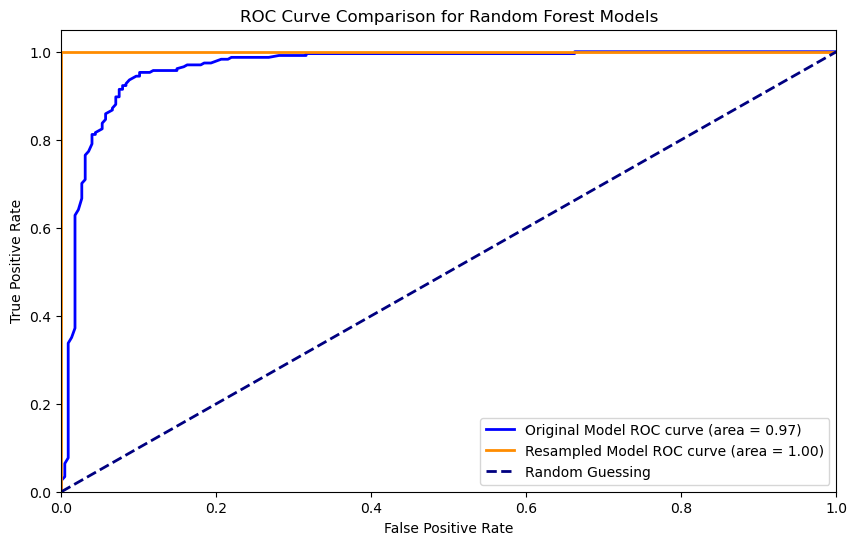

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef, \
    roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Standardize datasets
#scaler = StandardScaler()
#X_train_scaled_alzheimer = scaler.fit_transform(X_train_alzheimer)
#X_test_scaled_alzheimer = scaler.transform(X_test_alzheimer)
#X_train_scaledX_train_scaled_alzheimeralzheimer_resampled = scaler.fit_transform(data_balanced.drop(columns='Diagnosis'))

# Instantiate Random Forest models
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)  # Use more estimators as needed
rf_model_resampled = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)

# Perform stratified cross-validation for the original Random Forest model
accuracy_scores = cross_val_score(rf_model, X_train_alzheimer, y_train_alzheimer, cv=skf, scoring='accuracy')
y_pred_cross_val = cross_val_predict(rf_model, X_train_alzheimer, y_train_alzheimer, cv=skf)

# Perform stratified cross-validation for the resampled Random Forest model
accuracy_scores_resampled = cross_val_score(rf_model_resampled, data_under_sampling.drop(columns='Diagnosis'),
                                            data_under_sampling['Diagnosis'], cv=skf, scoring='accuracy')
y_pred_cross_val_resampled = cross_val_predict(rf_model_resampled, data_under_sampling.drop(columns='Diagnosis'),
                                               data_under_sampling['Diagnosis'], cv=skf)

# Evaluate cross-validated accuracy
print("Cross-validated Accuracy Scores (original model):")
print(accuracy_scores)
print(f'Cross-validated Mean Accuracy: {accuracy_scores.mean():.4f} \n')

print("Cross-validated Accuracy Scores (resampled model):")
print(accuracy_scores_resampled)
print(f'Cross-validated Mean Accuracy (resampled): {accuracy_scores_resampled.mean():.4f} \n')



# Fit the original Random Forest model
rf_model.fit(X_train_alzheimer, y_train_alzheimer)
y_pred_alzheimer = rf_model.predict(X_test_alzheimer)

# Fit the resampled Random Forest model
rf_model_resampled.fit(data_under_sampling.drop(columns='Diagnosis'), data_under_sampling['Diagnosis'])
y_pred_resampled = rf_model_resampled.predict(X_test_alzheimer)

# Evaluate accuracy on test set
accuracy = accuracy_score(y_test_alzheimer, y_pred_alzheimer)
accuracy_resampled = accuracy_score(y_test_alzheimer, y_pred_resampled)
print(f'Accuracy: {accuracy:.4f}')
print(f'Accuracy (resampled): {accuracy_resampled:.4f} \n')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred_alzheimer)
conf_matrix_resampled = confusion_matrix(y_test_alzheimer, y_pred_resampled)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Confusion Matrix (resampled):\n{conf_matrix_resampled}')

# Classification report
class_report = classification_report(y_test_alzheimer, y_pred_alzheimer)
class_report_resampled = classification_report(y_test_alzheimer, y_pred_resampled)
print(f'Classification Report:\n{class_report}')
print(f'Classification Report (resampled):\n{class_report_resampled}')

# Additional metrics: ROC-AUC and Matthews Correlation Coefficient
roc_auc = roc_auc_score(y_test_alzheimer, y_pred_alzheimer)
roc_auc_resampled = roc_auc_score(y_test_alzheimer, y_pred_resampled)
mcc = matthews_corrcoef(y_test_alzheimer, y_pred_alzheimer)
mcc_resampled = matthews_corrcoef(y_test_alzheimer, y_pred_resampled)

print(f'ROC-AUC: {roc_auc:.4f}')
print(f'ROC-AUC (resampled): {roc_auc_resampled:.4f}')
print(f'Matthews Correlation Coefficient: {mcc:.4f}')
print(f'Matthews Correlation Coefficient (resampled): {mcc_resampled:.4f}')

# Plot ROC Curves for both models
y_prob_alzheimer = rf_model.predict_proba(X_test_alzheimer)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test_alzheimer, y_prob_alzheimer)
roc_auc = auc(fpr, tpr)

y_prob_resampled = rf_model_resampled.predict_proba(X_test_alzheimer)[:, 1]
fpr_resampled, tpr_resampled, _ = roc_curve(y_test_alzheimer, y_prob_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original Model ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_resampled, tpr_resampled, color='darkorange', lw=2,
         label=f'Resampled Model ROC curve (area = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Random Forest Models')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef, \
    roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Standardize datasets
#scaler = StandardScaler()
#X_train_scaled_alzheimer = scaler.fit_transform(X_train_alzheimer)
#X_test_scaled_alzheimer = scaler.transform(X_test_alzheimer)
#X_train_scaledX_train_scaled_alzheimeralzheimer_resampled = scaler.fit_transform(data_balanced.drop(columns='Diagnosis'))

# Instantiate Random Forest models
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)  # Use more estimators as needed
rf_model_resampled = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)

# Perform stratified cross-validation for the original Random Forest model
accuracy_scores = cross_val_score(rf_model, X_train_alzheimer, y_train_alzheimer, cv=skf, scoring='accuracy')
y_pred_cross_val = cross_val_predict(rf_model, X_train_alzheimer, y_train_alzheimer, cv=skf)

# Perform stratified cross-validation for the resampled Random Forest model
accuracy_scores_resampled = cross_val_score(rf_model_resampled, data_under_sampling.drop(columns='Diagnosis'),
                                            data_under_sampling['Diagnosis'], cv=skf, scoring='accuracy')
y_pred_cross_val_resampled = cross_val_predict(rf_model_resampled, data_under_sampling.drop(columns='Diagnosis'),
                                               data_under_sampling['Diagnosis'], cv=skf)

# Fit the original Random Forest model
rf_model.fit(X_train_alzheimer, y_train_alzheimer)
y_pred_alzheimer = rf_model.predict(X_test_alzheimer)

# Fit the resampled Random Forest model
rf_model_resampled.fit(data_under_sampling.drop(columns='Diagnosis'), data_under_sampling['Diagnosis'])
y_pred_resampled = rf_model_resampled.predict(X_test_alzheimer)

# Evaluate cross-validated accuracy
print("Cross-validated Accuracy Scores (original model):")
print(accuracy_scores)
print(f'Cross-validated Mean Accuracy: {accuracy_scores.mean():.4f}')

print("Cross-validated Accuracy Scores (resampled model):")
print(accuracy_scores_resampled)
print(f'Cross-validated Mean Accuracy (resampled): {accuracy_scores_resampled.mean():.4f}')

# Evaluate accuracy on test set
accuracy = accuracy_score(y_test_alzheimer, y_pred_alzheimer)
accuracy_resampled = accuracy_score(y_test_alzheimer, y_pred_resampled)
print(f'Accuracy: {accuracy:.4f}')
print(f'Accuracy (resampled): {accuracy_resampled:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred_alzheimer)
conf_matrix_resampled = confusion_matrix(y_test_alzheimer, y_pred_resampled)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Confusion Matrix (resampled):\n{conf_matrix_resampled}')

# Classification report
class_report = classification_report(y_test_alzheimer, y_pred_alzheimer)
class_report_resampled = classification_report(y_test_alzheimer, y_pred_resampled)
print(f'Classification Report:\n{class_report}')
print(f'Classification Report (resampled):\n{class_report_resampled}')

# Additional metrics: ROC-AUC and Matthews Correlation Coefficient
roc_auc = roc_auc_score(y_test_alzheimer, y_pred_alzheimer)
roc_auc_resampled = roc_auc_score(y_test_alzheimer, y_pred_resampled)
mcc = matthews_corrcoef(y_test_alzheimer, y_pred_alzheimer)
mcc_resampled = matthews_corrcoef(y_test_alzheimer, y_pred_resampled)

print(f'ROC-AUC: {roc_auc:.4f}')
print(f'ROC-AUC (resampled): {roc_auc_resampled:.4f}')
print(f'Matthews Correlation Coefficient: {mcc:.4f}')
print(f'Matthews Correlation Coefficient (resampled): {mcc_resampled:.4f}')

# Plot ROC Curves for both models
y_prob_alzheimer = rf_model.predict_proba(X_test_alzheimer)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test_alzheimer, y_prob_alzheimer)
roc_auc = auc(fpr, tpr)

y_prob_resampled = rf_model_resampled.predict_proba(X_test_alzheimer)[:, 1]
fpr_resampled, tpr_resampled, _ = roc_curve(y_test_alzheimer, y_prob_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original Model ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_resampled, tpr_resampled, color='darkorange', lw=2,
         label=f'Resampled Model ROC curve (area = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Random Forest Models')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, matthews_corrcoef, \
    roc_curve, auc
import matplotlib.pyplot as plt

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate Random Forest models
rf_model = RandomForestClassifier(random_state=42, n_estimators=200)  # Use more estimators as needed
rf_model_resampled = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=200)

# Perform stratified cross-validation for the original Random Forest model
accuracy_scores = cross_val_score(rf_model, X_train_alzheimer, y_train_alzheimer, cv=skf, scoring='accuracy')
y_pred_cross_val = cross_val_predict(rf_model, X_train_alzheimer, y_train_alzheimer, cv=skf)

# Perform stratified cross-validation for the resampled Random Forest model
accuracy_scores_resampled = cross_val_score(rf_model_resampled, 
                                            data_balanced.drop(columns='Diagnosis'), 
                                            data_balanced['Diagnosis'], cv=skf, scoring='accuracy')
y_pred_cross_val_resampled = cross_val_predict(rf_model_resampled, 
                                               data_balanced.drop(columns='Diagnosis'), 
                                               data_balanced['Diagnosis'], cv=skf)

# Fit the original Random Forest model
rf_model.fit(X_train_alzheimer, y_train_alzheimer)
y_pred_alzheimer = rf_model.predict(X_test_alzheimer)

# Fit the resampled Random Forest model
rf_model_resampled.fit(data_balanced.drop(columns='Diagnosis'), data_balanced['Diagnosis'])
y_pred_resampled = rf_model_resampled.predict(X_test_alzheimer)

# Evaluate cross-validated accuracy
print("Cross-validated Accuracy Scores (original model):")
print(accuracy_scores)
print(f'Cross-validated Mean Accuracy: {accuracy_scores.mean():.4f}')

print("Cross-validated Accuracy Scores (resampled model):")
print(accuracy_scores_resampled)
print(f'Cross-validated Mean Accuracy (resampled): {accuracy_scores_resampled.mean():.4f}')

# Evaluate accuracy on test set
accuracy = accuracy_score(y_test_alzheimer, y_pred_alzheimer)
accuracy_resampled = accuracy_score(y_test_alzheimer, y_pred_resampled)
print(f'Accuracy: {accuracy:.4f}')
print(f'Accuracy (resampled): {accuracy_resampled:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test_alzheimer, y_pred_alzheimer)
conf_matrix_resampled = confusion_matrix(y_test_alzheimer, y_pred_resampled)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Confusion Matrix (resampled):\n{conf_matrix_resampled}')

# Classification report
class_report = classification_report(y_test_alzheimer, y_pred_alzheimer)
class_report_resampled = classification_report(y_test_alzheimer, y_pred_resampled)
print(f'Classification Report:\n{class_report}')
print(f'Classification Report (resampled):\n{class_report_resampled}')

# Additional metrics: ROC-AUC and Matthews Correlation Coefficient
roc_auc = roc_auc_score(y_test_alzheimer, y_pred_alzheimer)
roc_auc_resampled = roc_auc_score(y_test_alzheimer, y_pred_resampled)
mcc = matthews_corrcoef(y_test_alzheimer, y_pred_alzheimer)
mcc_resampled = matthews_corrcoef(y_test_alzheimer, y_pred_resampled)

print(f'ROC-AUC: {roc_auc:.4f}')
print(f'ROC-AUC (resampled): {roc_auc_resampled:.4f}')
print(f'Matthews Correlation Coefficient: {mcc:.4f}')
print(f'Matthews Correlation Coefficient (resampled): {mcc_resampled:.4f}')

# Plot ROC Curves for both models
y_prob_alzheimer = rf_model.predict_proba(X_test_alzheimer)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test_alzheimer, y_prob_alzheimer)
roc_auc = auc(fpr, tpr)

y_prob_resampled = rf_model_resampled.predict_proba(X_test_alzheimer)[:, 1]
fpr_resampled, tpr_resampled, _ = roc_curve(y_test_alzheimer, y_prob_resampled)
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Original Model ROC curve (area = {roc_auc:.2f})')
plt.plot(fpr_resampled, tpr_resampled, color='darkorange', lw=2,
         label=f'Resampled Model ROC curve (area = {roc_auc_resampled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Random Forest Models')
plt.legend(loc='lower right')
plt.show()


In [ ]:
X_train_scaled_alzheimer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming dt_model is your trained Decision Tree model
feature_importances = rf_model_resampled.feature_importances_

# Create a DataFrame for better handling and visualization
features_df = pd.DataFrame({
    'Feature': X_train_alzheimer.columns,  # Replace with actual column names if needed
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(14, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to show largest importance at the top
plt.show()